# Predictive Modeling Example

## Step 1: Import the libraries we will use in this notebook

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2 : Let's define our relationship to the data

In [27]:
b1 = 30.5 # slope for x
b0 = 20   # y intercept

## Step 3 : Now, Let us create the sample size that we will synthesize

In [28]:
sample_size = 475

We need to create a set of X (input) values. We could simply create a linear sequence...

In [29]:
x_mean = 100
x_stdev = 10
X = np.round(np.random.normal(x_mean, x_stdev, sample_size),2)

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [30]:
y = b0 + b1 * np.sin(X)

Now, let us see what our model looks like without noise

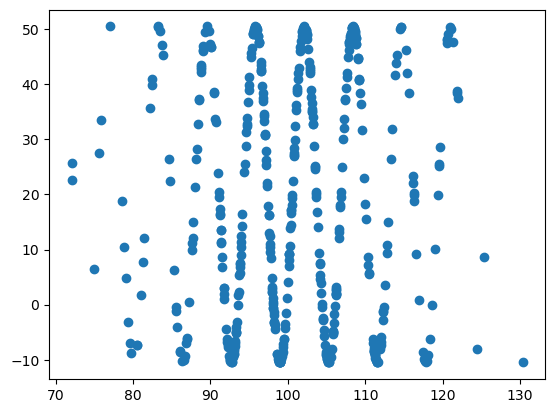

In [31]:
plt.scatter(X, y)
plt.show()

## Step 4: Add some random noise to 'hide' the model

In [32]:
e_mean = 0
e_stdev = 1
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
Y = y + e

## Step 5: Explore the resulting synthesized data

Let us now look at the data and the noise together

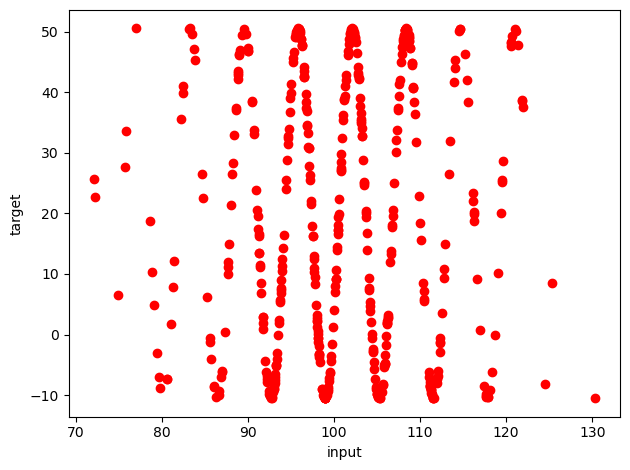

In [33]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 6 : Now let us put all the data into a data frame

In [34]:
df = pd.DataFrame({'input': X, 'target': Y})
df

,input,target
0,116.24,19.487310
1,93.88,7.083896
2,94.72,32.473376
3,89.27,49.882199
4,108.65,48.744894
...,...,...
470,107.77,43.492531
471,98.81,-10.476749
472,98.01,2.902849
473,118.66,1.096827


## Step 7: Save the data frame contents to a csv

In [35]:
df.to_csv('./data/obs dec.csv', index=False)

# Now, we have the data that is needed to run the model. Let us see if the model performs well for this set of data

## Step 8: Load the given data that we will use the model for

In [36]:
df = pd.read_csv('./data/obs dec.csv')

df.head(3)

,input,target
0,116.24,19.487310
1,93.88,7.083896
2,94.72,32.473376


In [37]:
df.shape

(475, 2)

### We can here see that we have decreased the Number of observations to almost less than a half

Seperate out the input m(X) and the target (y)

In [38]:
X=df[['input']]
y=df[['target']]

## Step 9: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

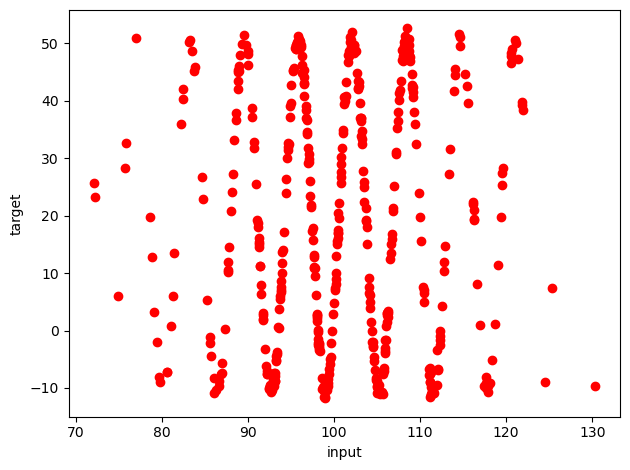

In [39]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 10: Fit the model

Fit the linear regression model to the dataset

In [40]:
lin_reg=LinearRegression()
_ = lin_reg.fit(np.sin(X),y)

# OR, we could combine the two lines above to one as follows...
#lin_reg = LinearRegression().fit(X,y)

## Step 11: Analyze the linear regression model's performance

Visualize the linear regression model results

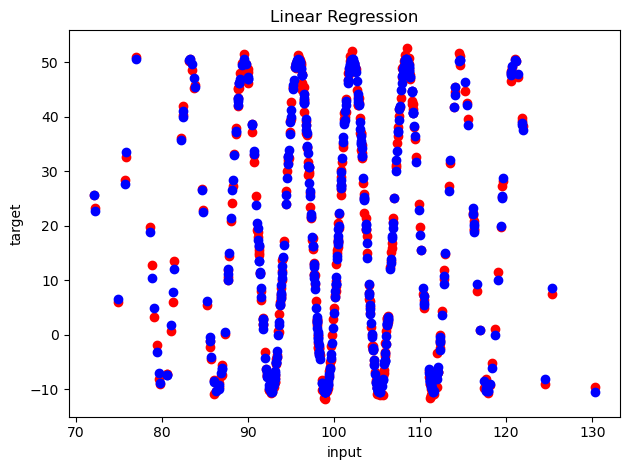

In [41]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg.predict(np.sin(X)),color='blue')

ax.set_title('Linear Regression')
ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

In [42]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
r2 = lin_reg.score(X, y)
print(f"Y = {b0:.2f} + {b1:.2f}sin(x)")
print(f"R^2: {lin_reg.score(np.sin(X), y):.3f}") 

Y = 20.03 + 30.49sin(x)
R^2: 0.998


## ANALYSIS
#### We started the regression model assuming b0=20.00 and b1=30.5. Now, with the effect of reducing the number of observations we have almost obtained the same data, i.e. b0=20.03, b1=30.49. 

#### This can be a effect of Over-fitting. Since the sample size is smaller than the usual, the model might not have sufficient data to correctly analyze the test data. So, Decreasing the sample size will cause an issue of Model Over-Fitting. We have to be extra cautious in deciding what the correct sample size will be. 